In [1]:
from runner import *

plotpath = parent_directory + "\\plots\\"
plotting.set_dir(plotpath)

loading complete, calculating accuracy
getting human labeled boundaries
complete


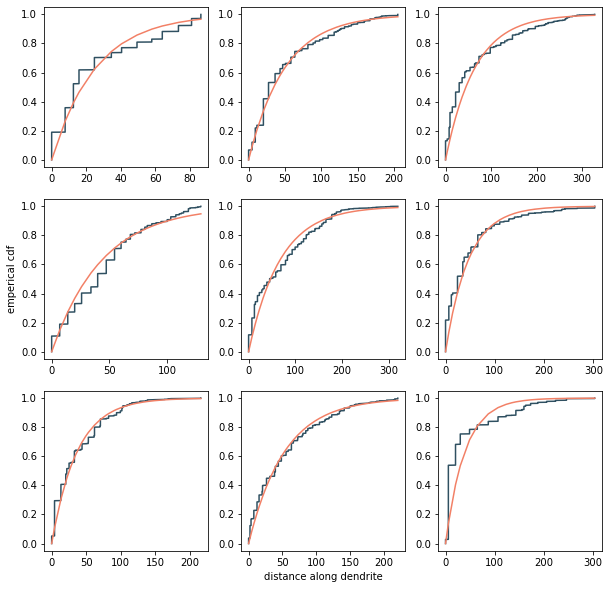

In [44]:
prna = RNA[RNA['process_index'] > 0].copy()

prna['branch'] = prna['cell_index'].astype(str) + "_" + prna['process_index'].astype(str).str[0]
branches = prna['branch'].value_counts().rename_axis("branch").reset_index(name="count")

fig, axes = plt.subplots(3, 3, figsize=(10,10))


for i, ax in enumerate(axes.flatten()):
    distances = prna[prna['branch']==branches['branch'][i]]['distance2Center']
    distances -= distances.min()
    # ax.set_yscale('log')
    x = np.sort(distances)
    y = np.arange(len(x), step=1)/float(len(x))
    rate = x.mean()
    ax.plot(x, y, c=two_map[1])
    ax.plot(x, 1 - np.exp(-x/rate), c=two_map[2])

axes[2,1].set_xlabel("distance along dendrite")
axes[1,0].set_ylabel("emperical cdf")

plt.savefig(plotpath + "empericalcdf.png")

In [43]:
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error

for i in range(9):
    distances = prna[prna['branch']==branches['branch'][i]]['distance2Center']
    distances -= distances.min()

    x = np.sort(distances)
    y = np.arange(len(x), step=1)/float(len(x))

    rate = x.mean()
    y_pred = 1 - np.exp(-x/rate)

    print(f'{i + 1} & {len(distances)} & {explained_variance_score(y, y_pred):.3} & {r2_score(y, y_pred):.3} \\\\ ')

1 & 2440 & 0.944 & 0.934 \\ 
2 & 2364 & 0.982 & 0.981 \\ 
3 & 2293 & 0.94 & 0.902 \\ 
4 & 2062 & 0.962 & 0.951 \\ 
5 & 2061 & 0.942 & 0.938 \\ 
6 & 2005 & 0.95 & 0.906 \\ 
7 & 1963 & 0.963 & 0.959 \\ 
8 & 1901 & 0.981 & 0.98 \\ 
9 & 1873 & 0.764 & 0.621 \\ 
